<a href="https://colab.research.google.com/github/jayakrishnakatta/APPLICATION-OF-TRAIN/blob/main/Loan_predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)
## Project Title: Machine Learning-Based Risk Prediction Model for Loan Application

**Dataset:** Home Credit Default Risk (`application_train.csv`)  
**Target Variable:** `TARGET`  
- `0` = No default (low risk)  
- `1` = Default (high risk)

**EDA Goals:**
- Understand dataset structure
- Check missing values
- Explore target imbalance
- Analyze numeric & categorical features
- Study relationship of features with TARGET


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
train = pd.read_csv("/content/drive/MyDrive/application_train.csv")

print("Shape:", train.shape)
train.head()


Shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 1. Dataset Structure and Data Types
We check the column names, data types, and general structure of the dataset.


In [4]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## 2. Statistical Summary
Basic descriptive statistics for numeric variables.


In [5]:
train.describe().T.head(20)


,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.00000,189145.500000,278202.00000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.00000,0.000000,0.00000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.00000,0.000000,0.00000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.00000,112500.000000,147150.00000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.00000,270000.000000,513531.00000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1615.50000,16524.000000,24903.00000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,40500.00000,238500.000000,450000.00000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,0.00029,0.010006,0.01885,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-25229.00000,-19682.000000,-15750.00000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-17912.00000,-2760.000000,-1213.00000,-289.000000,3.652430e+05


## 3. Duplicate Check
We check if there are duplicate rows and duplicate customer IDs.


In [6]:
print("Duplicate rows:", train.duplicated().sum())
print("Duplicate SK_ID_CURR:", train["SK_ID_CURR"].duplicated().sum())


Duplicate rows: 0
Duplicate SK_ID_CURR: 0


## 4. Target Variable Distribution (Loan Risk)
We analyze how many applicants defaulted vs not defaulted.
This also helps us identify class imbalance.


In [7]:
train["TARGET"].value_counts()


,count
TARGET,
0,282686
1,24825


In [8]:
default_rate = train["TARGET"].mean()
print("Default Rate:", round(default_rate*100, 2), "%")


Default Rate: 8.07 %


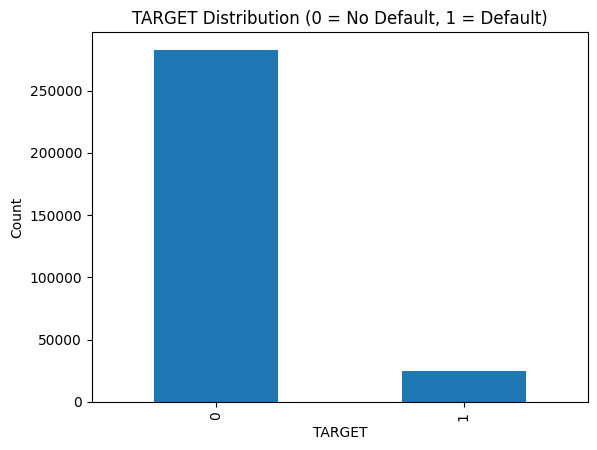

In [9]:
plt.figure()
train["TARGET"].value_counts().plot(kind="bar")
plt.title("TARGET Distribution (0 = No Default, 1 = Default)")
plt.xlabel("TARGET")
plt.ylabel("Count")
plt.show()


## 5. Missing Values Analysis
We compute missing value percentage for each feature and visualize top missing columns.


In [10]:
missing_percent = train.isnull().mean() * 100
missing_percent = missing_percent.sort_values(ascending=False)

missing_percent.head(20)


,0
COMMONAREA_AVG,69.872297
COMMONAREA_MODE,69.872297
COMMONAREA_MEDI,69.872297
NONLIVINGAPARTMENTS_MEDI,69.432963
NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_AVG,69.432963
FONDKAPREMONT_MODE,68.386172
LIVINGAPARTMENTS_AVG,68.354953
LIVINGAPARTMENTS_MEDI,68.354953
LIVINGAPARTMENTS_MODE,68.354953


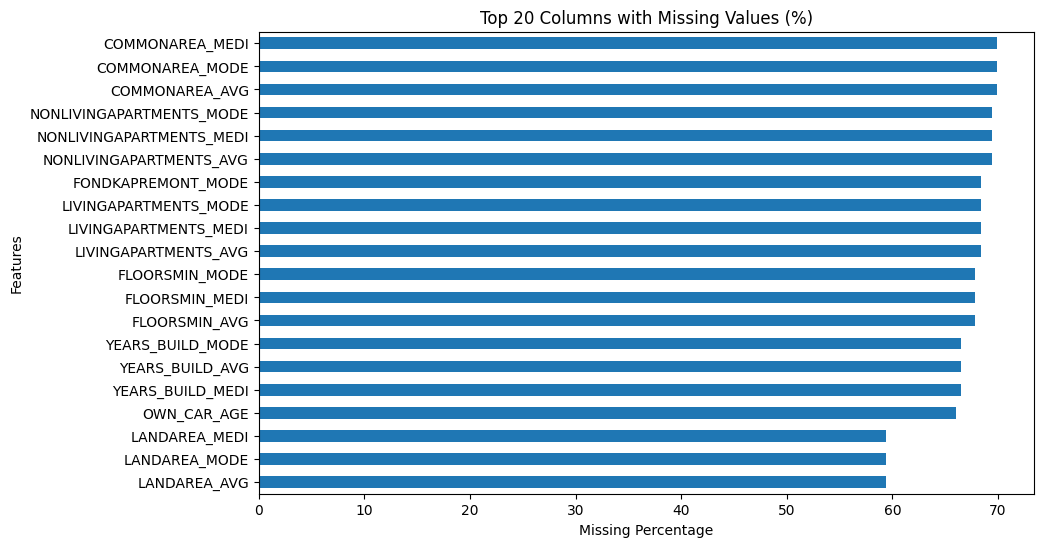

In [11]:
plt.figure(figsize=(10,6))
missing_percent.head(20).sort_values().plot(kind="barh")
plt.title("Top 20 Columns with Missing Values (%)")
plt.xlabel("Missing Percentage")
plt.ylabel("Features")
plt.show()


## 6. Separate Numeric and Categorical Features
We split columns into numeric and categorical to analyze them separately.


In [12]:
num_cols = train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = train.select_dtypes(include=["object"]).columns.tolist()

print("Numeric columns:", len(num_cols))
print("Categorical columns:", len(cat_cols))
cat_cols[:10]


Numeric columns: 106
Categorical columns: 16


['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE']

## 7. Numeric Feature Distributions
We analyze key numeric variables related to loan risk.


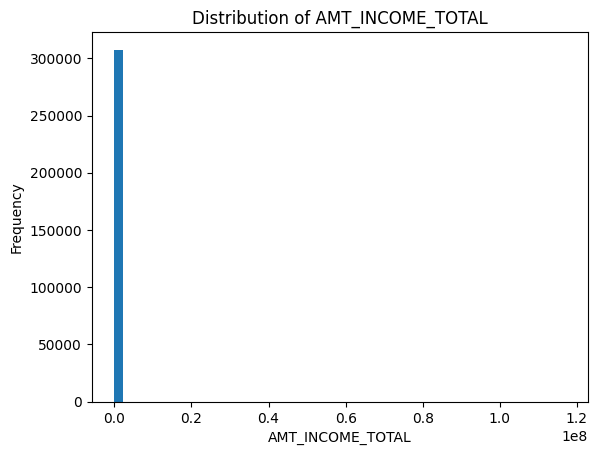

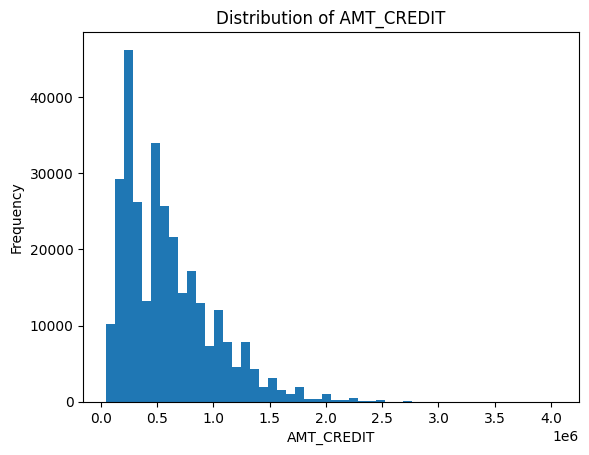

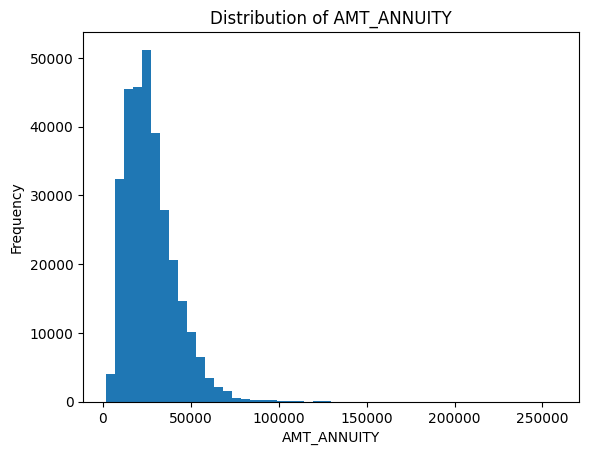

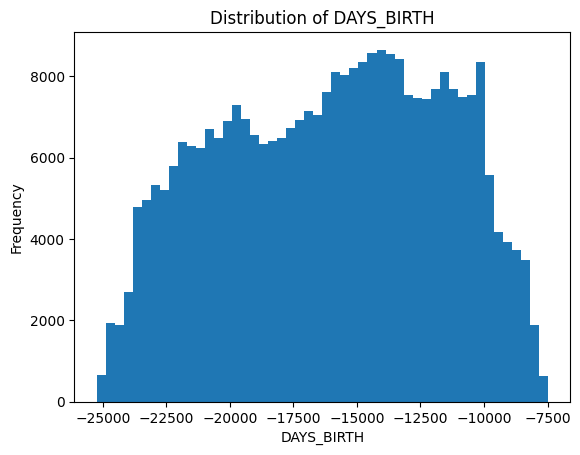

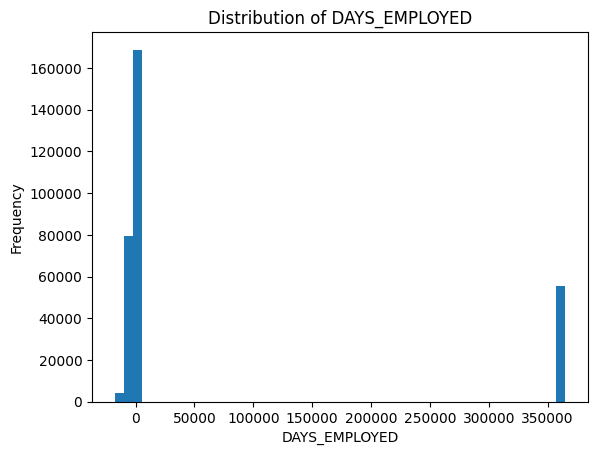

In [13]:
key_numeric = ["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","DAYS_BIRTH","DAYS_EMPLOYED"]

for col in key_numeric:
    if col in train.columns:
        plt.figure()
        train[col].replace([np.inf,-np.inf], np.nan).dropna().plot(kind="hist", bins=50)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()


## 8. Categorical Feature Counts
We inspect major categories for important applicant features.


In [14]:
key_cats = ["CODE_GENDER","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE"]

for col in key_cats:
    if col in train.columns:
        print("\n", col)
        print(train[col].value_counts().head(10))



 CODE_GENDER
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

 NAME_INCOME_TYPE
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

 NAME_EDUCATION_TYPE
NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

 NAME_FAMILY_STATUS
NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

 NAME_HOUSING_TYPE
NAME_HOUSING_TYPE
House / apartment      272868
With par

## 9. Default Rate by Category (Risk Segmentation)
We compute average TARGET (default rate) for different categories.
Higher mean = higher risk.


In [15]:
def default_rate_by_category(df, col, min_count=500):
    grp = df.groupby(col)["TARGET"].agg(["count","mean"]).sort_values("mean", ascending=False)
    return grp[grp["count"] >= min_count]

for col in ["CODE_GENDER","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS"]:
    if col in train.columns:
        print("\nDefault rate by:", col)
        display(default_rate_by_category(train, col))



Default rate by: CODE_GENDER


,count,mean
CODE_GENDER,,
M,105059,0.101419
F,202448,0.069993



Default rate by: NAME_INCOME_TYPE


,count,mean
NAME_INCOME_TYPE,,
Working,158774,0.095885
Commercial associate,71617,0.074843
State servant,21703,0.057550
Pensioner,55362,0.053864



Default rate by: NAME_EDUCATION_TYPE


,count,mean
NAME_EDUCATION_TYPE,,
Lower secondary,3816,0.109277
Secondary / secondary special,218391,0.089399
Incomplete higher,10277,0.084850
Higher education,74863,0.053551



Default rate by: NAME_FAMILY_STATUS


,count,mean
NAME_FAMILY_STATUS,,
Civil marriage,29775,0.099446
Single / not married,45444,0.098077
Separated,19770,0.081942
Married,196432,0.075599
Widow,16088,0.058242


## 10. Correlation with TARGET (Numeric Features)
We identify numeric features most correlated with default risk.


In [16]:
corr = train.corr(numeric_only=True)["TARGET"].sort_values()

print("Top 10 Negative correlations (reduce risk):")
print(corr.head(10))

print("\nTop 10 Positive correlations (increase risk):")
print(corr.tail(11))


Top 10 Negative correlations (reduce risk):
EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64

Top 10 Positive correlations (increase risk):
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64


# EDA Summary / Findings

**Key Findings:**
1. TARGET is imbalanced (few defaulters compared to non-defaulters).
2. Many columns contain missing values, some with very high missing percentages.
3. Financial variables (income, credit, annuity) are right-skewed and contain outliers.
4. Applicant demographic categories show different default rates.
5. Correlation analysis highlights important numeric predictors for risk.

**Next Steps:**
- Handle missing values
- Encode categorical variables
- Balance classes (SMOTE/class weights)
- Train models: Logistic Regression, Random Forest, XGBoost
